In [0]:
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

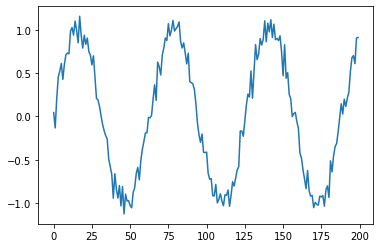

In [0]:
#making original data
# series= np.sin(0.1*np.arange(200))
#when noise is added
#in Real World 
series= np.sin(0.1*np.arange(200))+ np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [0]:
#build dataset
#using T as past values try to predict next value

T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x= series[t:t+T]
  X.append(x)
  y= series[t+T]
  Y.append(y)

X= np.array(X).reshape(-1,T,1)#N*T*D
Y= np.array(Y)
N= len(X)
print("x.shape:",X.shape,"y.shape:",Y.shape)

x.shape: (190, 10, 1) y.shape: (190,)


In [0]:
#Auto regressive RNN model

i= Input(shape=(T,1))
x= SimpleRNN(5,activation='relu')(i)

#for simpleRNN default activation is "tanh" 
#a RNN model without any activation i.e. activation=None works well as 
#it behaves as a linear model
#and if we want to add customized eg.(activation='relu') we can add

x= Dense(1)(x)
model= Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

#training the RNN
r= model.fit(    
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data= (X[-N//2:],Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 0s 53ms/step - loss: 0.9083 - val_loss: 0.1530
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1452 - val_loss: 0.0432
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0563 - val_loss: 0.0377
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0419 - val_loss: 0.0847
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0466 - val_loss: 0.0391
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0324 - val_loss: 0.0360
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0291 - val_loss: 0.0323
Epoch 8/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0247 - val_loss: 0.0286
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0216 - val_loss: 0.0321
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0204 - val_loss: 0.0278
Epoch 11/80
3/3 [============

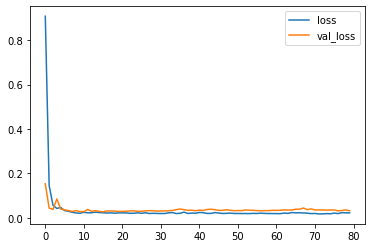

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [0]:
"Wrong Forecast Example Using true target"
#ONE Step Forecast

validation_target= Y[-N//2:]
validation_predictions= []

#index of first validation input
i= -N//2
while len(validation_predictions)<len(validation_target):
  p= model.predict(X[i].reshape(1,-1))[0,0] 
  i+=1
  validation_predictions.append(p)

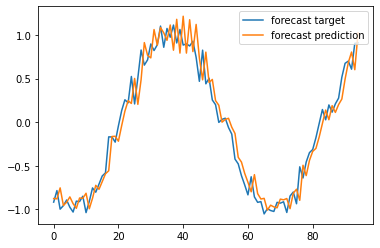

In [0]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

In [0]:
#Correct Way for forecast
"Forecast future values (using only self-predictions for making future predictions)"
#Multi-Step Forecast

validation_target= Y[-N//2:]
validation_predictions= []

#last train input
last_x= X[-N//2]

while len(validation_predictions)<len(validation_target):
  p= model.predict(last_x.reshape(1,-1))[0,0] 

  #update prediction_list
  validation_predictions.append(p)

  #make the new input
  last_x= np.roll(last_x,-1)
  last_x[-1]= p

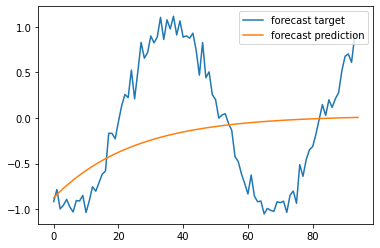

In [0]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()